In [10]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from torch import nn
from torchtext.legacy import data
from tqdm import tqdm

from util import init_device, load_params
from util.mmd import run_test
from util.model import MMD, MyEmbedding, MyMLP
from util.nlp_preprocessing import dataframe2dataset, tokenizer_en, tokenizer_ja

In [11]:
print("Loading parameters...")
params = load_params("/workspace/amazon_review/config/params_mmd.json")

params["target_ratio"] = [0.01, 0.05, 0.1, 0.3, 0.5]
params["lambda"] = [0.0, 0.3, 0.7, 1.0, 3.0, 7.0]

GPU available: cuda
Loading parameters...
 ja_train_path:	 /workspace/data/dataset_ja_train.json
 ja_dev_path:	 /workspace/data/dataset_ja_dev.json
 ja_test_path:	 /workspace/data/dataset_ja_test.json
 en_train_path:	 /workspace/data/dataset_en_train.json
 en_dev_path:	 /workspace/data/dataset_en_dev.json
 en_test_path:	 /workspace/data/dataset_en_test.json
 ja_vector_path:	 /workspace/amazon_review/weight/japanese_fasttext_vectors.vec
 is_developing:	 True
 source_category:	 home
 target_category:	 wireless
 target_ratio:	 0.01
 lambda:	 0
 use_pretrained_vector:	 False
 token_max_length:	 256
 batch_size:	 32
 emb_dim:	 300
 class_num:	 2
 criterion:	 CrossEntropyLoss
 lr:	 1e-05
 optimizer:	 Adam
 epochs:	 10


---------------
lambda = 0.0
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 4/4 [00:00<00:00, 22.50it/s]


epoch 1 / 10



  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.541	Target: 0.539	All: 1.080

epoch 2 / 10
Loss -> Source: 0.387	Target: 0.259	All: 0.646

epoch 3 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.362	Target: 0.235	All: 0.597

epoch 4 / 10
Loss -> Source: 0.354	Target: 0.198	All: 0.552

epoch 5 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.336	Target: 0.161	All: 0.497

epoch 6 / 10
Loss -> Source: 0.358	Target: 0.181	All: 0.540

epoch 7 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.332	Target: 0.144	All: 0.476

epoch 8 / 10
Loss -> Source: 0.358	Target: 0.130	All: 0.488

epoch 9 / 10


100%|██████████| 4/4 [00:00<00:00, 33.63it/s]


Loss -> Source: 0.343	Target: 0.130	All: 0.473

epoch 10 / 10
Loss -> Source: 0.363	Target: 0.141	All: 0.505

Test source Accuracy: 59.30
Test source F1 Score: 41.39

Test target Accuracy: 40.23
Test target F1 Score: 39.28


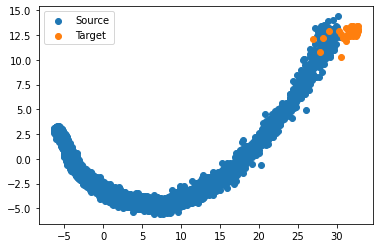

[[   0 3000]
 [   3 1997]]
---------------
lambda = 0.3
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/4 [00:00<?, ?it/s]


epoch 1 / 10
Loss -> Source: 0.398	Target: 0.399	MMD: 0.469	All: 1.105

epoch 2 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.387	Target: 0.277	MMD: 0.293	All: 0.852

epoch 3 / 10
Loss -> Source: 0.413	Target: 0.254	MMD: 0.221	All: 0.805

epoch 4 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.360	Target: 0.230	MMD: 0.270	All: 0.759

epoch 5 / 10
Loss -> Source: 0.390	Target: 0.196	MMD: 0.190	All: 0.704

epoch 6 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.354	Target: 0.176	MMD: 0.211	All: 0.650

epoch 7 / 10
Loss -> Source: 0.341	Target: 0.152	MMD: 0.143	All: 0.603

epoch 8 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.378	Target: 0.135	MMD: 0.176	All: 0.612

epoch 9 / 10
Loss -> Source: 0.369	Target: 0.117	MMD: 0.160	All: 0.595

epoch 10 / 10


100%|██████████| 4/4 [00:00<00:00, 32.90it/s]


Loss -> Source: 0.414	Target: 0.111	MMD: 0.157	All: 0.615

Test source Accuracy: 55.77
Test source F1 Score: 34.24

Test target Accuracy: 59.53
Test target F1 Score: 44.42


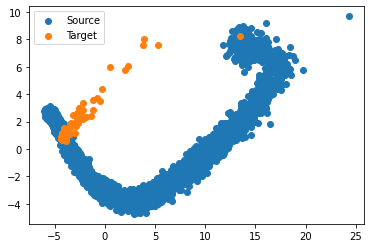

[[2926   74]
 [1935   65]]
---------------
lambda = 0.7
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/4 [00:00<?, ?it/s]


epoch 1 / 10
Loss -> Source: 0.369	Target: 0.333	MMD: 0.440	All: 1.375

epoch 2 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.353	Target: 0.264	MMD: 0.280	All: 1.015

epoch 3 / 10
Loss -> Source: 0.377	Target: 0.262	MMD: 0.305	All: 1.043

epoch 4 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.341	Target: 0.211	MMD: 0.218	All: 0.849

epoch 5 / 10
Loss -> Source: 0.374	Target: 0.182	MMD: 0.199	All: 0.847

epoch 6 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.327	Target: 0.162	MMD: 0.209	All: 0.755

epoch 7 / 10
Loss -> Source: 0.338	Target: 0.146	MMD: 0.169	All: 0.712

epoch 8 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.380	Target: 0.144	MMD: 0.146	All: 0.734

epoch 9 / 10
Loss -> Source: 0.365	Target: 0.137	MMD: 0.169	All: 0.738

epoch 10 / 10


100%|██████████| 4/4 [00:00<00:00, 33.78it/s]


Loss -> Source: 0.418	Target: 0.132	MMD: 0.133	All: 0.748

Test source Accuracy: 53.80
Test source F1 Score: 33.94

Test target Accuracy: 56.75
Test target F1 Score: 35.00


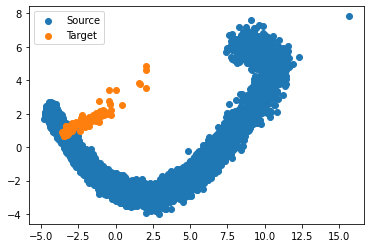

[[2194  806]
 [1358  642]]
---------------
lambda = 1.0
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/4 [00:00<?, ?it/s]


epoch 1 / 10
Loss -> Source: 0.395	Target: 0.382	MMD: 0.452	All: 1.768

epoch 2 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.407	Target: 0.277	MMD: 0.295	All: 1.246

epoch 3 / 10
Loss -> Source: 0.372	Target: 0.253	MMD: 0.217	All: 1.148

epoch 4 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.364	Target: 0.197	MMD: 0.215	All: 0.995

epoch 5 / 10
Loss -> Source: 0.386	Target: 0.199	MMD: 0.210	All: 0.993

epoch 6 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.343	Target: 0.162	MMD: 0.202	All: 0.890

epoch 7 / 10
Loss -> Source: 0.372	Target: 0.141	MMD: 0.155	All: 0.853

epoch 8 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.370	Target: 0.125	MMD: 0.149	All: 0.818

epoch 9 / 10
Loss -> Source: 0.345	Target: 0.122	MMD: 0.152	All: 0.811

epoch 10 / 10


100%|██████████| 4/4 [00:00<00:00, 33.77it/s]


Loss -> Source: 0.404	Target: 0.115	MMD: 0.141	All: 0.791

Test source Accuracy: 52.75
Test source F1 Score: 34.40

Test target Accuracy: 49.50
Test target F1 Score: 32.79


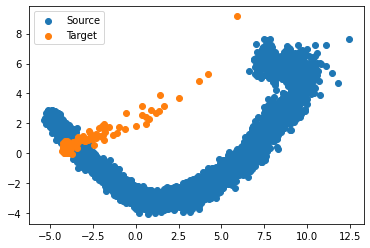

[[1283 1717]
 [ 805 1195]]
---------------
lambda = 3.0
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/4 [00:00<?, ?it/s]


epoch 1 / 10
Loss -> Source: 0.369	Target: 0.367	MMD: 0.360	All: 3.451

epoch 2 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.357	Target: 0.294	MMD: 0.282	All: 2.427

epoch 3 / 10
Loss -> Source: 0.393	Target: 0.281	MMD: 0.196	All: 1.831

epoch 4 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.353	Target: 0.234	MMD: 0.217	All: 1.815

epoch 5 / 10
Loss -> Source: 0.385	Target: 0.244	MMD: 0.196	All: 1.658

epoch 6 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.334	Target: 0.232	MMD: 0.145	All: 1.545

epoch 7 / 10
Loss -> Source: 0.354	Target: 0.170	MMD: 0.139	All: 1.441

epoch 8 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.369	Target: 0.154	MMD: 0.133	All: 1.388

epoch 9 / 10
Loss -> Source: 0.358	Target: 0.149	MMD: 0.153	All: 1.335

epoch 10 / 10


100%|██████████| 4/4 [00:00<00:00, 33.32it/s]


Loss -> Source: 0.361	Target: 0.143	MMD: 0.138	All: 1.290

Test source Accuracy: 52.07
Test source F1 Score: 34.09

Test target Accuracy: 48.35
Test target F1 Score: 32.20


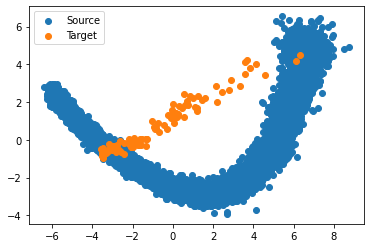

[[1226 1774]
 [ 812 1188]]
---------------
lambda = 7.0
---------------
Source num: 10000, Target num: 100
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/4 [00:00<?, ?it/s]


epoch 1 / 10
Loss -> Source: 0.363	Target: 0.397	MMD: 0.455	All: 8.143

epoch 2 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.352	Target: 0.317	MMD: 0.374	All: 5.943

epoch 3 / 10
Loss -> Source: 0.343	Target: 0.315	MMD: 0.233	All: 4.202

epoch 4 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.369	Target: 0.295	MMD: 0.243	All: 3.809

epoch 5 / 10
Loss -> Source: 0.365	Target: 0.280	MMD: 0.248	All: 3.886

epoch 6 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.343	Target: 0.261	MMD: 0.176	All: 3.075

epoch 7 / 10
Loss -> Source: 0.354	Target: 0.240	MMD: 0.160	All: 3.030

epoch 8 / 10


  0%|          | 0/4 [00:00<?, ?it/s]

Loss -> Source: 0.360	Target: 0.228	MMD: 0.158	All: 2.961

epoch 9 / 10
Loss -> Source: 0.375	Target: 0.214	MMD: 0.163	All: 2.825

epoch 10 / 10


100%|██████████| 4/4 [00:00<00:00, 33.30it/s]


Loss -> Source: 0.370	Target: 0.203	MMD: 0.172	All: 2.749

Test source Accuracy: 51.87
Test source F1 Score: 33.94

Test target Accuracy: 55.75
Test target F1 Score: 35.11


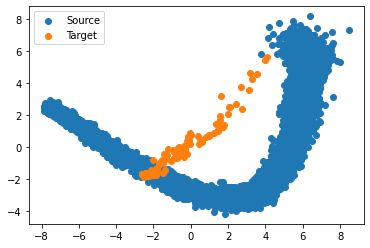

[[2036  964]
 [1244  756]]


In [12]:
for target_ratio in params["target_ratio"]:
    for la in params["lambda"]:
        print("------------------------------")
        print(f"target_ratio = {target_ratio}\tlambda = {la}")
        print("------------------------------")

        # パラメータ初期化
        seed = 0
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        device = init_device()
        
        # データセット読み込み
        train_source_df = pd.read_json(params["ja_train_path"], orient="record", lines=True)
        if params["is_developing"]:
            train_source_df = train_source_df.sample(n=10000, random_state=1)
        dev_source_df = pd.read_json(params["ja_dev_path"], orient="record", lines=True)
        test_source_df = pd.read_json(params["ja_test_path"], orient="record", lines=True)
        train_target_df = pd.read_json(params["en_train_path"], orient="record", lines=True)
        if params["is_developing"]:
            train_target_df = train_target_df.sample(n=10000, random_state=1)
        dev_target_df = pd.read_json(params["en_dev_path"], orient="record", lines=True)
        test_target_df = pd.read_json(params["en_test_path"], orient="record", lines=True)

        # targetドメインの割合を減らす
        # targetの分類性能を下げるため
        train_target_num = int(min(train_source_df.shape[0] * target_ratio, train_target_df.shape[0]))
        train_target_df = train_target_df.sample(train_target_num, replace=False)
        print(f"Source num: {train_source_df.shape[0]}, Target num: {train_target_df.shape[0]}")

        # クラスラベル設定
        for df in [train_source_df, dev_source_df, test_source_df, train_target_df, dev_target_df, test_target_df]:
            # 3以上かを予測する場合
            df["class"] = 0
            df["class"][df["stars"] > 3] = 1

            # 5クラス分類する場合
            # df["class"] = df["stars"] - 1

        # フィールド作成
        print("Building data iterator...")
        source_text_field = data.Field(
            sequential=True,
            tokenize=tokenizer_ja,
            use_vocab=True,
            lower=True,
            include_lengths=True,
            batch_first=True,
            fix_length=params["token_max_length"],
            init_token="<cls>",
            eos_token="<eos>",
        )
        target_text_field = data.Field(
            sequential=True,
            tokenize=tokenizer_en,
            use_vocab=True,
            lower=True,
            include_lengths=True,
            batch_first=True,
            fix_length=params["token_max_length"],
            init_token="<cls>",
            eos_token="<eos>",
        )
        label_field = data.Field(sequential=False, use_vocab=False)
        ja_fields = [("text", source_text_field), ("label", label_field)]
        en_fields = [("text", target_text_field), ("label", label_field)]

        # データセット作成
        columns = ["review_body", "class"]
        train_source_dataset = dataframe2dataset(train_source_df, ja_fields, columns)
        dev_source_dataset = dataframe2dataset(dev_source_df, ja_fields, columns)
        test_source_dataset = dataframe2dataset(test_source_df, ja_fields, columns)
        train_target_dataset = dataframe2dataset(train_target_df, en_fields, columns)
        dev_target_dataset = dataframe2dataset(dev_target_df, en_fields, columns)
        test_target_dataset = dataframe2dataset(test_target_df, en_fields, columns)

        # embedding作成
        source_text_field.build_vocab(train_source_dataset, min_freq=1)
        target_text_field.build_vocab(train_target_dataset, min_freq=1)

        # データローダー
        # train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
        dev_source_iter = data.BucketIterator(
            dataset=dev_source_dataset, batch_size=params["batch_size"], train=False, sort=False
        )
        test_source_iter = data.BucketIterator(
            dataset=test_source_dataset, batch_size=params["batch_size"], train=False, sort=False
        )
        train_target_iter = data.BucketIterator(dataset=train_target_dataset, batch_size=params["batch_size"], train=True)
        dev_target_iter = data.BucketIterator(
            dataset=dev_target_dataset, batch_size=params["batch_size"], train=False, sort=False
        )
        test_target_iter = data.BucketIterator(
            dataset=test_target_dataset, batch_size=params["batch_size"], train=False, sort=False
        )

        # モデル構築
        ja_v_size = len(source_text_field.vocab.stoi)
        en_v_size = len(target_text_field.vocab.stoi)
        source_embedding = MyEmbedding(params["emb_dim"], ja_v_size, params["token_max_length"]).to(device)
        target_embedding = MyEmbedding(params["emb_dim"], en_v_size, params["token_max_length"]).to(device)
        mlp = MyMLP(class_num=params["class_num"]).to(device)
        criterion = getattr(nn, params["criterion"])()
        mmd = MMD("rbf")

        optimizer_s_emb = getattr(torch.optim, params["optimizer"])(source_embedding.parameters(), lr=params["lr"])
        optimizer_t_emb = getattr(torch.optim, params["optimizer"])(target_embedding.parameters(), lr=params["lr"])
        optimizer_mlp = getattr(torch.optim, params["optimizer"])(mlp.parameters(), lr=params["lr"])

        split_ratio = len(train_target_dataset) / len(train_source_dataset)

        # 訓練
        for epoch in range(params["epochs"]):
            print(f"\nepoch {epoch+1} / {params['epochs']}")
            # 各lossの初期化
            total_source_loss = 0
            total_target_loss = 0
            total_mmd_loss = 0
            total_all_loss = 0

            # MMDのためにターゲットと同数のソースが必要なためエポックごとにソースのデータローダーを作成し直す
            # エポックごとに異なるソースのデータが使用されるようになる
            random.seed(epoch)
            train_source_subset, _ = train_source_dataset.split(split_ratio=split_ratio)
            train_source_iter = data.BucketIterator(
                dataset=train_source_subset, batch_size=params["batch_size"], train=True
            )

            for i, (source_batch, target_batch) in tqdm(
                enumerate(zip(train_source_iter, train_target_iter)), total=len(train_source_iter)
            ):
                source_embedding.train()
                target_embedding.train()
                mlp.train()

                source_x, source_y = source_batch.text[0].to(device), (source_batch.label).to(device)
                target_x, target_y = target_batch.text[0].to(device), (target_batch.label).to(device)

                # MMDの処理はBatch数が同数でなけらばならないためcontinueする
                # sourceとtargetで毎回同じBatch数だけデータがロードされる処理ができれば下の処理は不要
                if source_x.shape[0] != params["batch_size"] or target_x.shape[0] != params["batch_size"]:
                    continue

                source_embed = source_embedding(source_x)
                source_pred = mlp(source_embed)
                source_loss = criterion(source_pred, source_y)
                total_source_loss += source_loss.cpu()

                target_embed = target_embedding(target_x)
                target_pred = mlp(target_embed)
                target_loss = criterion(target_pred, target_y)
                total_target_loss += target_loss.cpu()

                mmd_loss = mmd(source_embed, target_embed)
                total_mmd_loss = mmd_loss.cpu()
                all_loss = source_loss + target_loss + la * mmd_loss

                optimizer_s_emb.zero_grad()
                optimizer_t_emb.zero_grad()
                optimizer_mlp.zero_grad()

                all_loss.backward()

                optimizer_s_emb.step()
                optimizer_t_emb.step()
                optimizer_mlp.step()
                total_all_loss += all_loss.cpu()

            mean_source_loss = total_source_loss / len(train_source_iter)
            mean_target_loss = total_target_loss / len(train_target_iter)
            mean_all_loss = total_all_loss / len(train_source_iter)
            if la == 0:
                print(f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tAll: {mean_all_loss:.3f}")
            else:
                mean_mmd_loss = total_mmd_loss / len(train_source_iter)
                print(
                    f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tMMD: {mean_mmd_loss:.3f}\tAll: {mean_all_loss:.3f}"  # noqa #E501
                )

            # dev_source_accuracy, dev_source_f1 = run_test(source_embedding, mlp, dev_source_iter, device)
            # print(f"\nDev source Accuracy: {dev_source_accuracy:.2f}")
            # print(f"Dev source F1 Score: {dev_source_f1:.2f}")
            # dev_target_accuracy, dev_target_f1 = run_test(target_embedding, mlp, dev_target_iter, device)
            # print(f"\nDev target Accuracy: {dev_target_accuracy:.2f}")
            # print(f"Dev target F1 Score: {dev_target_f1:.2f}")

        test_source_accuracy, test_source_f1 = run_test(source_embedding, mlp, test_source_iter, device)
        print(f"\nTest source Accuracy: {test_source_accuracy:.2f}")
        print(f"Test source F1 Score: {test_source_f1:.2f}")
        test_target_accuracy, test_target_f1 = run_test(target_embedding, mlp, test_target_iter, device)
        print(f"\nTest target Accuracy: {test_target_accuracy:.2f}")
        print(f"Test target F1 Score: {test_target_f1:.2f}")

        # 特徴量可視化
        source_embedding.eval()
        target_embedding.eval()

        train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
        source_embedding_list = []
        for batch in train_source_iter:
            x, _ = batch.text[0].to(device), (batch.label).to(device)
            with torch.no_grad():
                embedding = source_embedding(x)
            source_embedding_list.extend(embedding.cpu().numpy())
        source_df = pd.DataFrame(np.array(source_embedding_list))

        target_embedding_list = []
        for batch in train_target_iter:
            x, _ = batch.text[0].to(device), (batch.label).to(device)
            with torch.no_grad():
                embedding = target_embedding(x)
            target_embedding_list.extend(embedding.cpu().numpy())
        target_df = pd.DataFrame(np.array(target_embedding_list))

        pca = PCA(n_components=2)
        pca.fit(source_df)
        source_pca_df = pca.transform(source_df)
        target_pca_df = pca.transform(target_df)
        source_pca_df.shape

        plt.scatter(source_pca_df[:, 0], source_pca_df[:, 1], label="Source")
        plt.scatter(target_pca_df[:, 0], target_pca_df[:, 1], label="Target")
        plt.legend()
        plt.show()

        label_list = []
        pred_list = []
        for batch in test_target_iter:
            x, y = batch.text[0].to(device), (batch.label).to(device)
            with torch.no_grad():
                embedding = target_embedding(x)
                pred = mlp(embedding)
            label_list.extend(list(y.cpu().numpy()))
            pred_list.extend(list(pred.cpu().numpy().argmax(1)))
        print(confusion_matrix(label_list, pred_list))